In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r"C:\Users\siddaraja naik\Downloads\pokedex.csv")

In [4]:
data.head()

,Image,Index,Name,Type 1,Type 2,Total,HP,Attack,Defense,SP. Atk.,SP. Def,Speed
0,images/1.png,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,images/2.png,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,images/3.png,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,images/4.png,3,Venusaur Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,images/5.png,4,Charmander,Fire,NaN,309,39,52,43,60,50,65


Exploratory Data Analysis

In [5]:
data.describe()

,Index,Total,HP,Attack,Defense,SP. Atk.,SP. Def,Speed
count,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000
mean,501.735802,443.104527,71.244444,81.152263,75.007407,73.224691,72.441152,70.034568
std,298.979081,121.193406,26.927819,32.037134,30.740999,32.757152,27.578188,30.161298
min,1.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,240.500000,332.000000,52.000000,57.000000,52.000000,50.000000,51.000000,45.000000
50%,495.000000,465.000000,70.000000,80.000000,70.000000,65.000000,70.000000,68.000000
75%,753.500000,521.000000,85.000000,100.000000,91.000000,95.000000,90.000000,91.000000
max,1025.000000,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


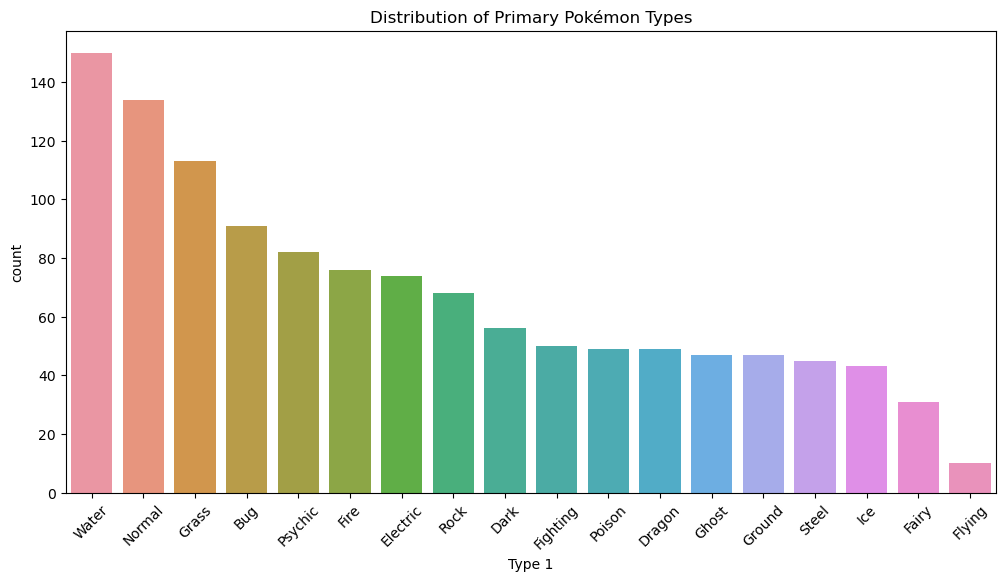

In [8]:
# Distribution of Pokémon types
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Type 1', order=data['Type 1'].value_counts().index)
plt.title('Distribution of Primary Pokémon Types')
plt.xticks(rotation=45)
plt.show()

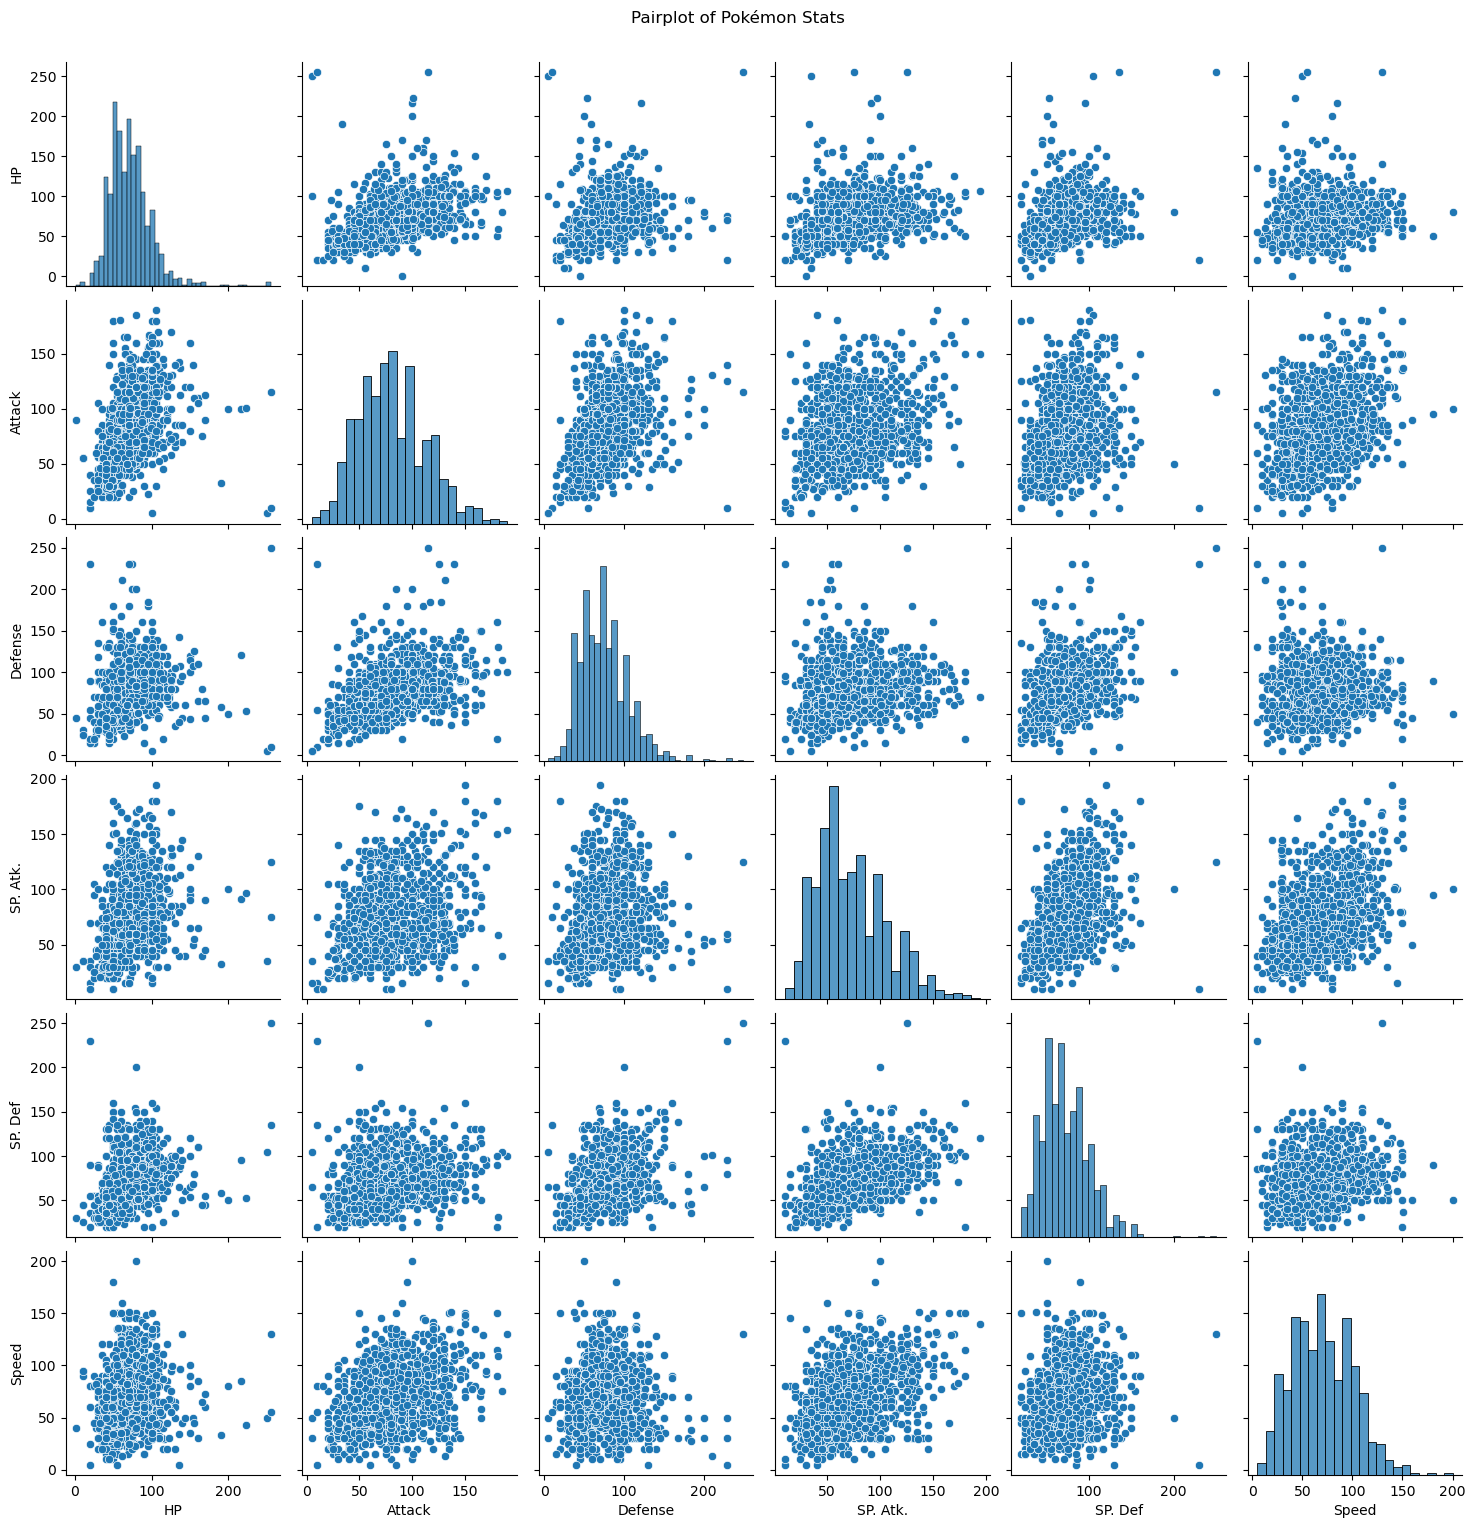

In [10]:
# Pairplot of stats
sns.pairplot(data[['HP', 'Attack', 'Defense', 'SP. Atk.', 'SP. Def', 'Speed']])
plt.suptitle('Pairplot of Pokémon Stats', y=1.02)
plt.show()

Statistical Analysis


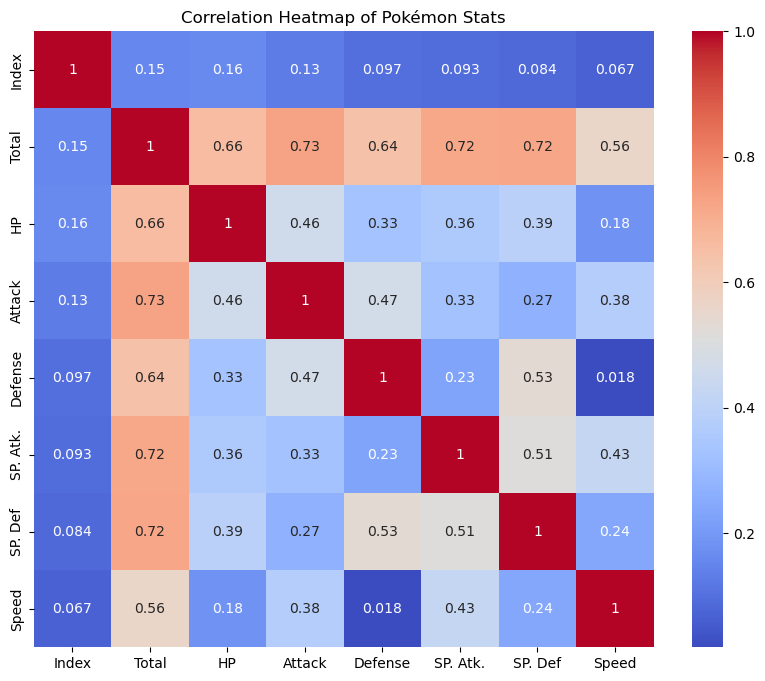

In [12]:
# Correlation heatmap
numeric_df = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Pokémon Stats')
plt.show()

Predictive Modelling

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
X = data[['HP', 'Attack', 'Defense', 'SP. Atk.', 'SP. Def', 'Speed']]
y = data['Total']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression

In [16]:
model = LinearRegression()

In [18]:
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)

In [20]:
mse = mean_squared_error(y_test, y_pred)

In [21]:
mse

2.8412393484321663e-26

In [22]:
r2 = r2_score(y_test, y_pred)

In [23]:
r2

1.0